In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.cross_validation import (cross_val_score,
                                      KFold)
from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler)
from sklearn.svm import LinearSVC

In [3]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
digits = load_digits().data
digits_target = load_digits().target

In [10]:
digits.shape

(1797, 64)

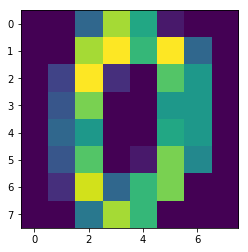

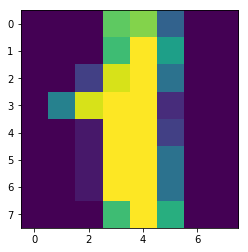

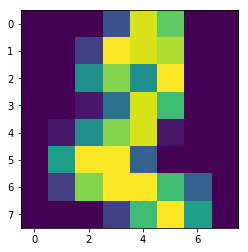

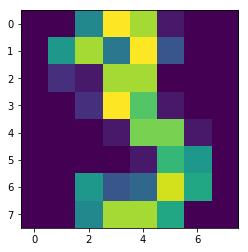

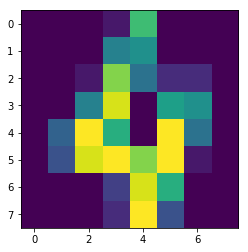

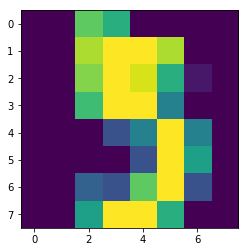

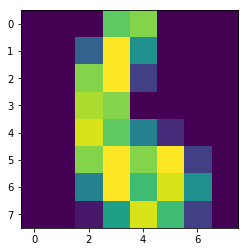

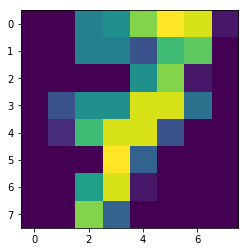

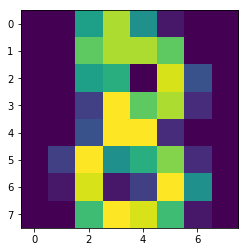

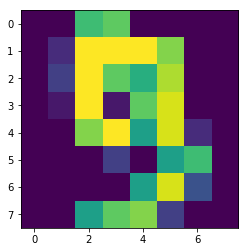

In [15]:
for i in range(10):
    plt.imshow(digits[i, :].reshape((8,8)))
    plt.show()

In [6]:
digits_target

array([0, 1, 2, ..., 8, 9, 8])

In [66]:
pca = PCA(n_components=30)
digitss = StandardScaler().fit_transform(digits)
pca.fit(X=digitss)
X_transform = pca.transform(X=digitss)

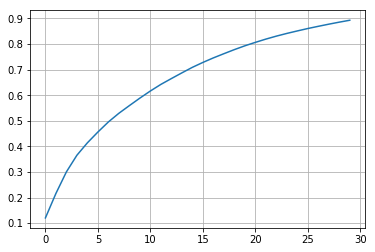

In [67]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.show()

In [70]:
lda = LinearDiscriminantAnalysis()
lda.fit(X=X_transform, y=digits_target)
X_lda = lda.transform(X=X_transform)
digits_target = LabelEncoder().fit_transform(y=digits_target)
svc = LinearSVC(C=0.1)
#lda.fit(X=X_transform, y=digits_target)

In [19]:
for i in range(3):
    cv = KFold(n_folds=10, n=digits.shape[0])
    pepe = Pipeline([
                     ('scaler', StandardScaler()),
                     #('pca', PCA(n_components=39)),
                     #('lda', LinearDiscriminantAnalysis()),
                     ('classifier', LinearSVC(C=0.6))
                    ])
    scores = cross_val_score(estimator=pepe, X=digits, y=digits_target, cv=cv)
    print(scores.mean())

0.924869646182
0.924869646182
0.924314090627
